# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_data = {}

In [17]:
response = requests.get(query_url)
response_json = response.json()

In [18]:
lat = response_json['coord']['lat']
lng = response_json['coord']['lon']
max_temp = response_json['main']['temp_max']
humidity = response_json['main']['humidity']
cloudiness = response_json['clouds']['all']
wind_speed = response_json['wind']['speed']
country = response_json['sys']['country']
date = response_json['dt']
response_json

{'coord': {'lon': 27.9116, 'lat': -33.0153},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 53.85,
  'feels_like': 51.89,
  'temp_min': 53.85,
  'temp_max': 53.85,
  'pressure': 1030,
  'humidity': 63,
  'sea_level': 1030,
  'grnd_level': 1024},
 'visibility': 10000,
 'wind': {'speed': 7.34, 'deg': 284, 'gust': 11.12},
 'clouds': {'all': 0},
 'dt': 1659314239,
 'sys': {'country': 'ZA', 'sunrise': 1659329956, 'sunset': 1659367799},
 'timezone': 7200,
 'id': 1006984,
 'name': 'East London',
 'cod': 200}

In [23]:
print('Beginning Data Retrieval')
print('------------------------------')
rec = 0
sets = 1
for city in cities:
    query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'
    response = requests.get(query_url)
    response_json = response.json()
    try:
        lat = response_json['coord']['lat']
        lng = response_json['coord']['lon']
        max_temp = response_json['main']['temp_max']
        humidity = response_json['main']['humidity']
        cloudiness = response_json['clouds']['all']
        wind_speed = response_json['wind']['speed']
        country = response_json['sys']['country']
        date = response_json['dt']
        weather_data[city] = [lat, lng, max_temp, humidity, cloudiness, wind_speed, country, date]
        rec += 1
        print(f'Processing Record {rec} of Set {sets} | {city}')
    except KeyError:
        print(f'Error Cannot Find {city} skipping...')
        rec = 1
        sets += 1
    

    
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | dingle
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | adrar
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | bathsheba
Processing Record 13 of Set 1 | hami
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | husavik
Processing Record 22 of Set 1 | comodoro rivadavia
Processing Record 23 of Set 1 | vestmann

Processing Record 2 of Set 17 | umm kaddadah
Error Cannot Find samusu skipping...
Processing Record 1 of Set 18 | samusu
Processing Record 2 of Set 18 | swan hill
Processing Record 3 of Set 18 | morant bay
Processing Record 4 of Set 18 | yulara
Processing Record 5 of Set 18 | manta
Processing Record 6 of Set 18 | ancud
Processing Record 7 of Set 18 | kapaa
Processing Record 8 of Set 18 | tortoli
Processing Record 9 of Set 18 | vostok
Processing Record 10 of Set 18 | slave lake
Processing Record 11 of Set 18 | sangmelima
Processing Record 12 of Set 18 | puerto escondido
Processing Record 13 of Set 18 | tezu
Processing Record 14 of Set 18 | monterrey
Processing Record 15 of Set 18 | osorno
Processing Record 16 of Set 18 | buldana
Processing Record 17 of Set 18 | preobrazheniye
Processing Record 18 of Set 18 | asyut
Processing Record 19 of Set 18 | itoman
Processing Record 20 of Set 18 | paragominas
Processing Record 21 of Set 18 | plettenberg bay
Processing Record 22 of Set 18 | ciudad g

Processing Record 2 of Set 34 | ponta do sol
Processing Record 3 of Set 34 | wenling
Processing Record 4 of Set 34 | synya
Error Cannot Find pousat skipping...
Processing Record 1 of Set 35 | pousat
Processing Record 2 of Set 35 | pussi
Processing Record 3 of Set 35 | namatanai
Processing Record 4 of Set 35 | buraydah
Processing Record 5 of Set 35 | yuancheng
Processing Record 6 of Set 35 | gerash
Processing Record 7 of Set 35 | mana
Processing Record 8 of Set 35 | vale da amoreira
Processing Record 9 of Set 35 | praya
Processing Record 10 of Set 35 | araouane
Processing Record 11 of Set 35 | bardiyah
Processing Record 12 of Set 35 | broken hill
Processing Record 13 of Set 35 | rocha
Processing Record 14 of Set 35 | safford
Processing Record 15 of Set 35 | shakawe
Processing Record 16 of Set 35 | pimenta bueno
Processing Record 17 of Set 35 | saint george
Processing Record 18 of Set 35 | teahupoo
Processing Record 19 of Set 35 | padrauna
Processing Record 20 of Set 35 | iwanai
Processi

Processing Record 10 of Set 46 | machakos
Processing Record 11 of Set 46 | puerto leguizamo
Processing Record 12 of Set 46 | angoche
Processing Record 13 of Set 46 | albanel
Processing Record 14 of Set 46 | gambela
Processing Record 15 of Set 46 | nampula
Processing Record 16 of Set 46 | ilulissat
Processing Record 17 of Set 46 | winchester
Processing Record 18 of Set 46 | porto-vecchio
Processing Record 19 of Set 46 | sabang
Processing Record 20 of Set 46 | ahtopol
Processing Record 21 of Set 46 | inhambane
Processing Record 22 of Set 46 | panama city
Processing Record 23 of Set 46 | necochea
Processing Record 24 of Set 46 | puruliya
Processing Record 25 of Set 46 | kharitonovo
Processing Record 26 of Set 46 | piacabucu
Processing Record 27 of Set 46 | arrifes
Processing Record 28 of Set 46 | toamasina
Processing Record 29 of Set 46 | petropavlovsk-kamchatskiy
Processing Record 30 of Set 46 | songjianghe
Processing Record 31 of Set 46 | taoudenni
Processing Record 32 of Set 46 | antof

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
city_successes = weather_data.keys()
weather_data['east london']
lat = []
lng = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []
for city in city_successes:
    data = weather_data[city]
    lat.append(data[0])
    lng.append(data[1])
    temp.append(data[2])
    hum.append(data[3])
    cloud.append(data[4])
    wind.append(data[5])
    country.append(data[6])
    date.append(data[7])
weather_df = pd.DataFrame(list(zip(city_successes, lat, lng, temp, hum, cloud, wind, country, date)), 
                          columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,53.85,63,0,7.34,ZA,1659314593
1,cidreira,-30.1811,-50.2056,58.66,89,3,9.53,BR,1659314615
2,vaini,-21.2000,-175.2000,80.76,89,75,6.91,TO,1659314616
3,jamestown,42.0970,-79.2353,74.84,72,20,4.61,US,1659314616
4,dingle,10.9995,122.6711,82.58,75,100,1.14,PH,1659314616
...,...,...,...,...,...,...,...,...,...
552,luderitz,-26.6481,15.1594,57.42,52,0,7.00,NA,1659314877
553,north bend,43.4065,-124.2243,70.92,91,20,10.36,US,1659314878
554,misratah,32.3754,15.0925,81.63,75,0,10.49,LY,1659314878
555,stokmarknes,68.5646,14.9108,53.58,87,100,0.00,NO,1659314878


In [77]:
weather_df.describe()
weather_df.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

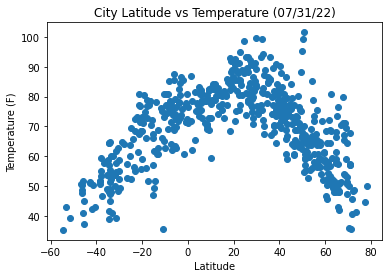

In [43]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs Temperature (07/31/22)')
plt.show()

## Latitude vs. Humidity Plot

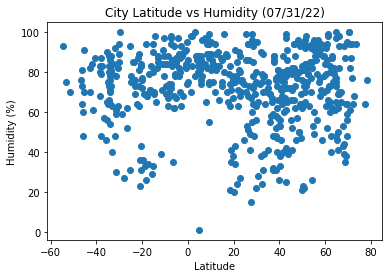

In [39]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (07/31/22)')
plt.show()

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness (07/31/22)')

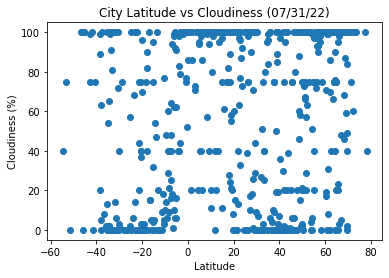

In [40]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (07/31/22)')

## Latitude vs. Wind Speed Plot

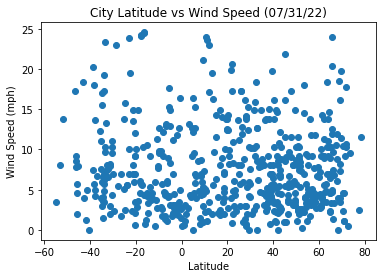

In [42]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (07/31/22)')
plt.show()

## Linear Regression

In [46]:
north_df = weather_df.loc[weather_df['Lat'] >= 0].reset_index(drop=True)
south_df = weather_df.loc[weather_df['Lat'] < 0].reset_index(drop=True)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,53.85,63,0,7.34,ZA,1659314593
1,cidreira,-30.1811,-50.2056,58.66,89,3,9.53,BR,1659314615
2,vaini,-21.2000,-175.2000,80.76,89,75,6.91,TO,1659314616
3,hobart,-42.8794,147.3294,51.26,70,75,18.41,AU,1659314424
4,port alfred,-33.5906,26.8910,52.20,73,0,9.66,ZA,1659314617
...,...,...,...,...,...,...,...,...,...
167,amahai,-3.3333,128.9167,80.37,80,79,2.01,ID,1659314875
168,kiama,-34.6833,150.8667,64.58,65,2,3.00,AU,1659314876
169,santa maria,-29.6842,-53.8069,49.30,100,1,2.30,BR,1659314877
170,aragarcas,-15.8975,-52.2508,72.21,29,0,0.69,BR,1659314877


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

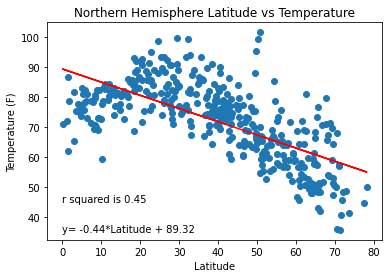

In [78]:
slope_1, inter_1, r_1, p_1, stdev_1 = linregress(north_df['Lat'], north_df['Max Temp'])
line_of_fit_1 = round(slope_1,2) * round(north_df['Lat'],2) + round(inter_1, 2)
line_eq_1 = f'y= {round(slope_1, 2)}*Latitude + {round(inter_1, 2)}'
plt.scatter(north_df['Lat'], north_df['Max Temp'])
plt.plot(north_df['Lat'], (line_of_fit_1), color='r')
plt.title('Northern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq_1, [0, 35])
plt.annotate(f'r squared is {round(r_1**2, 2)}',[0,45])
plt.savefig('northern_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

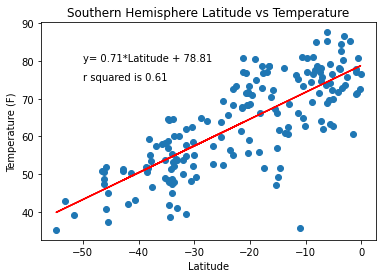

In [79]:
slope_2, inter_2, r_2, p_2, stdev_2 = linregress(south_df['Lat'], south_df['Max Temp'])
line_of_fit_2 = round(slope_2,2) * round(south_df['Lat'],2) + round(inter_2, 2)
line_eq_2 = f'y= {round(slope_2, 2)}*Latitude + {round(inter_2, 2)}'
plt.scatter(south_df['Lat'], south_df['Max Temp'])
plt.plot(south_df['Lat'], (line_of_fit_2), color='r')
plt.title('Southern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq_2, [-50, 80])
plt.annotate(f'r squared is {round(r_2**2, 2)}',[-50,75])
plt.savefig('southern_temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

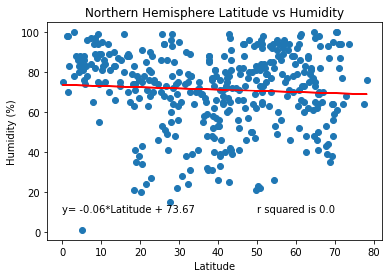

In [80]:
slope_3, inter_3, r_3, p_3, stdev_3 = linregress(north_df['Lat'], north_df['Humidity'])
line_of_fit_3 = round(slope_3,2) * round(north_df['Lat'],2) + round(inter_3, 2)
line_eq_3 = f'y= {round(slope_3, 2)}*Latitude + {round(inter_3, 2)}'
plt.scatter(north_df['Lat'], north_df['Humidity'])
plt.plot(north_df['Lat'], (line_of_fit_3), color='r')
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq_3, [0, 10])
plt.annotate(f'r squared is {round(r_3**2, 2)}',[50,10])
plt.savefig('northern_humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

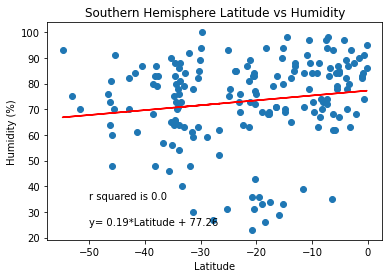

In [81]:
slope_4, inter_4, r_4, p_4, stdev_4 = linregress(south_df['Lat'], south_df['Humidity'])
line_of_fit_4 = round(slope_4,2) * round(south_df['Lat'],2) + round(inter_4, 2)
line_eq_4 = f'y= {round(slope_4, 2)}*Latitude + {round(inter_4, 2)}'
plt.scatter(south_df['Lat'], south_df['Humidity'])
plt.plot(south_df['Lat'], (line_of_fit_4), color='r')
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq_4, [-50, 25])
plt.annotate(f'r squared is {round(r_3**2, 2)}',[-50,35])
plt.savefig('southern_humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

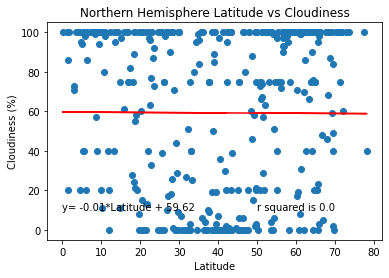

In [82]:
slope_5, inter_5, r_5, p_5, stdev_5 = linregress(north_df['Lat'], north_df['Cloudiness'])
line_of_fit_5 = round(slope_5,2) * round(north_df['Lat'],2) + round(inter_5, 2)
line_eq_5 = f'y= {round(slope_5, 2)}*Latitude + {round(inter_5, 2)}'
plt.scatter(north_df['Lat'], north_df['Cloudiness'])
plt.plot(north_df['Lat'], (line_of_fit_5), color='r')
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq_5, [0, 10])
plt.annotate(f'r squared is {round(r_5**2, 2)}',[50,10])
plt.savefig('northern_cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

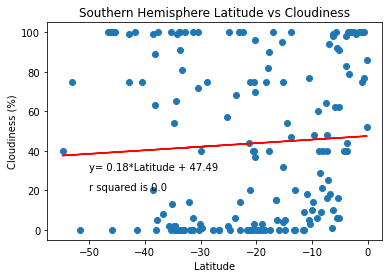

In [83]:
slope_6, inter_6, r_6, p_6, stdev_6 = linregress(south_df['Lat'], south_df['Cloudiness'])
line_of_fit_6 = round(slope_6,2) * round(south_df['Lat'],2) + round(inter_6, 2)
line_eq_6 = f'y= {round(slope_6, 2)}*Latitude + {round(inter_6, 2)}'
plt.scatter(south_df['Lat'], south_df['Cloudiness'])
plt.plot(south_df['Lat'], (line_of_fit_6), color='r')
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq_6, [-50, 30])
plt.annotate(f'r squared is {round(r_6**2, 2)}',[-50,20])
plt.savefig('southern_cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

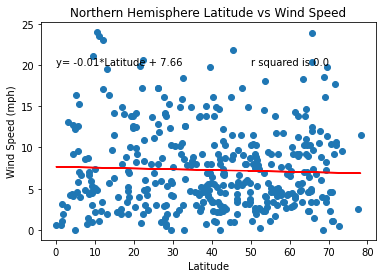

In [84]:
slope_7, inter_7, r_7, p_7, stdev_7 = linregress(north_df['Lat'], north_df['Wind Speed'])
line_of_fit_7 = round(slope_7,2) * round(north_df['Lat'],2) + round(inter_7, 2)
line_eq_7 = f'y= {round(slope_7, 2)}*Latitude + {round(inter_7, 2)}'
plt.scatter(north_df['Lat'], north_df['Wind Speed'])
plt.plot(north_df['Lat'], (line_of_fit_7), color='r')
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq_7, [0, 20])
plt.annotate(f'r squared is {round(r_7**2, 2)}',[50,20])
plt.savefig('northern_wind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

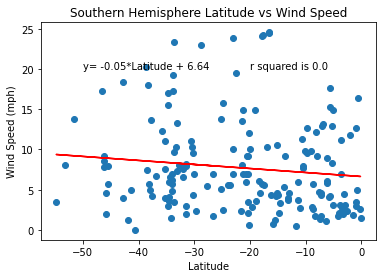

In [85]:
slope_8, inter_8, r_8, p_8, stdev_8 = linregress(south_df['Lat'], south_df['Wind Speed'])
line_of_fit_8 = round(slope_8,2) * round(south_df['Lat'],2) + round(inter_8, 2)
line_eq_8 = f'y= {round(slope_8, 2)}*Latitude + {round(inter_8, 2)}'
plt.scatter(south_df['Lat'], south_df['Wind Speed'])
plt.plot(south_df['Lat'], (line_of_fit_8), color='r')
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq_8, [-50, 20])
plt.annotate(f'r squared is {round(r_7**2, 2)}',[-20,20])
plt.savefig('southern_wind.png')
plt.show()